In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from env.wind_env import *
from env.wind.wind_map import *
from env.utils import reward_1, reward_4, energy

In [3]:
start = (100, 900)
target = (800, 200)
radius = 30
mu = 20

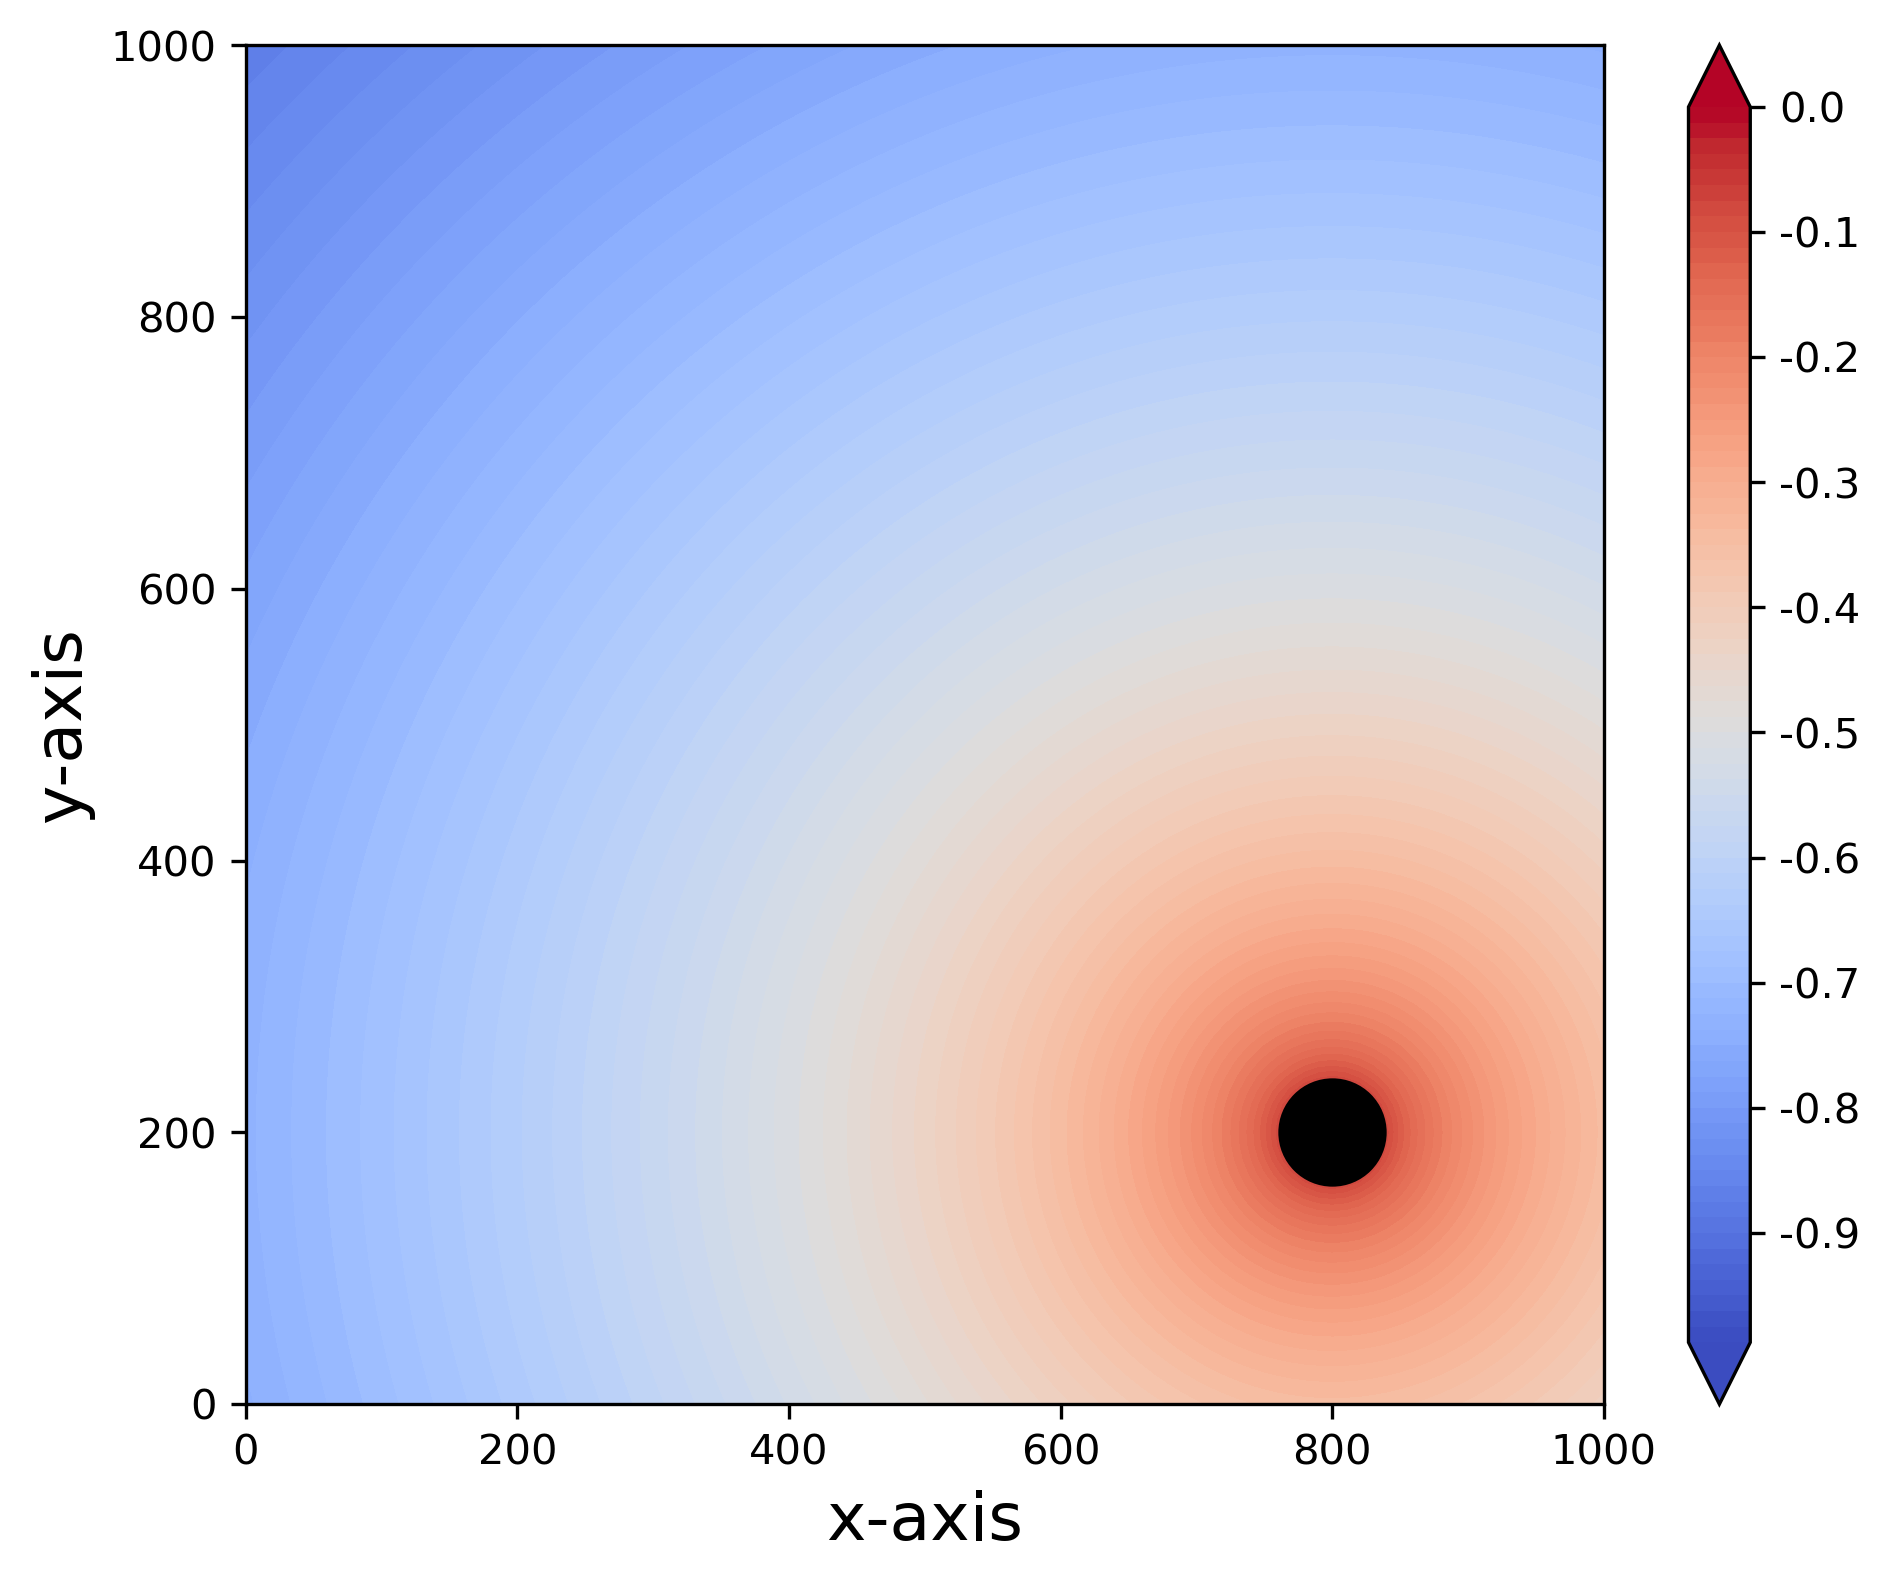

In [85]:
localisation = []
X = []
Y = []
for i in range(101):
    X.append(i * 1000/100)
    Y.append(i* 1000/100)
    
Z_magnitude = np.zeros( (len(Y), len(X)) )

for i in range(len(X)*len(Y)):
    row = i % len(Y)
    col = i // len(Y)
    if (X[col]-target[0])**2 + (Y[row]-target[1])**2 < radius **2:
        is_target = True
    else:
        is_target = False
    Z_magnitude[row, col] = reward_1([0, X[col], Y[row]], target, 1000, 1000, radius, is_target, bonus = 1)
    
fig = plt.figure(figsize = (7.3, 6), dpi = 300)
plt.contourf(X, Y, Z_magnitude, levels = np.linspace(-1, 0, 80), cmap='coolwarm', extend = 'both', vmin = -1, vmax = 0)
cb = plt.colorbar()
cb.ax.set_yticklabels([str(round(i, 1)) for i in cb.get_ticks()])


plt.plot(target[0], target[1], 'ko', markersize = 25)


plt.ylabel('y-axis', fontsize = 16)
plt.xlabel('x-axis', fontsize = 16)
plt.axis('equal')
plt.savefig('../log_files/wind_map_1/Rewards/1.png')
plt.show()
plt.close(fig)

In [5]:


wind_info_1 = {
    'number' : 1,
    'lengthscale' : 500,
    'info' : [
    [(5, 350),(5, 315),(10, 290),(10, 270),(15, 260),(15, 250),(15, 250)],
    [(5, 350),(10, 340),(10, 315),(10, 300),(15, 260),(15, 260),(15, 240)],
    [(5, 0),(5, 350),(10, 315),(10, 300),(15, 270),(15, 250),(15, 250)],
    [(5, 0),(5, 355),(10, 340),(10, 315),(15, 280),(10, 270),(15, 260)],
    [(5, 0),(5, 0),(10, 350),(5, 330),(5, 300),(15, 280),(15, 270)],
    [(5, 0),(5, 0),(5, 350),(5, 335),(5, 290),(10, 280),(15, 270)],
    [(5, 0),(5, 350),(5, 340),(5, 330),(5, 315),(10, 280),(15, 270)]
]
}
wind_info = wind_info_1['info']
wind_lengthscale = wind_info_1['lengthscale']

discrete_maps = get_discrete_maps(wind_info)
A = WindMap(discrete_maps, wind_lengthscale)

In [63]:
Wind = A
def plot_reward_4(angle):
    localisation = []
    X = []
    Y = []
    for i in range(101):
        X.append(i * 1000/100)
        Y.append(i* 1000/100)
        for j in range(101):
            localisation.append( (i* 1000/100, j*1000/100) )

    prediction_magnitude = Wind._get_magnitude(localisation)
    prediction_direction = Wind._get_direction(localisation)
    Z = np.zeros( (len(Y), len(X)) )
    # Z_direction = np.zeros( (len(Y), len(X)) )
    for i in range(len(prediction_magnitude)):
        row = i % len(Y)
        col = i // len(Y)
        ##Calcul de v_prop
        cos = np.cos((prediction_direction[i] - angle)* np.pi / 180)
        delta = prediction_magnitude[i]**2 * (cos**2 - 1) + mu**2
        if(delta <= 0):
            raise Exception("The wind is too high to find a real valued propulsion velocity")
        else:
            v_prop = - prediction_magnitude[i] * cos + np.sqrt(delta)

        e = energy(v_prop, 20)

        if (X[col]-target[0])**2 + (Y[row]-target[1])**2 < radius **2:
            is_target = True
        else:
            is_target = False

        Z[row, col] = reward_4(e, is_target, bonus = 0)

    return X, Y, Z

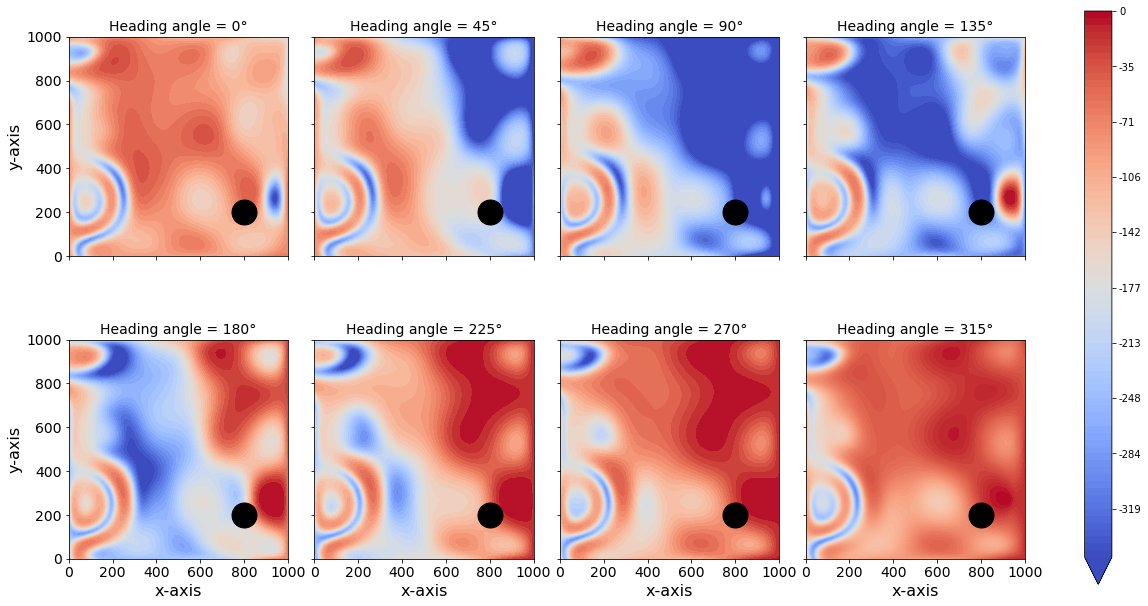

In [87]:
fig1, axs = plt.subplots(nrows=2,ncols=4, figsize=(18,9),sharex='col', sharey='row')
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8) = axs


levels = np.linspace(-800, 0, 80)
cmap='coolwarm'

X, Y, Z = plot_reward_4(0)
cs1 = ax1.contourf(X, Y, Z, levels=levels, cmap=cmap, vmin = -350, vmax = 0)
ax1.plot(target[0], target[1], 'ko', markersize = 25)
ax1.set_ylabel('y-axis', fontsize=16)
ax1.tick_params(labelsize=14)
ax1.set_title('Heading angle = 0°', fontsize=14)
ax1.set_aspect('equal')

X, Y, Z = plot_reward_4(45)
cs2 = ax2.contourf(X, Y, Z, levels=levels, cmap=cmap, vmin = -350, vmax = 0)
ax2.plot(target[0], target[1], 'ko', markersize = 25)
ax2.set_title('Heading angle = 45°', fontsize=14)
ax2.set_aspect('equal')


X, Y, Z = plot_reward_4(90)
cs3 = ax3.contourf(X, Y, Z, levels=levels, cmap=cmap, vmin = -350, vmax = 0)
ax3.plot(target[0], target[1], 'ko', markersize = 25)
ax3.set_title('Heading angle = 90°', fontsize=14)
ax3.set_aspect('equal')

X, Y, Z = plot_reward_4(135)
cs4 = ax4.contourf(X, Y, Z, levels=levels, cmap=cmap, vmin = -350, vmax = 0)
ax4.plot(target[0], target[1], 'ko', markersize = 25)
ax4.set_title('Heading angle = 135°', fontsize=14)
ax4.set_aspect('equal')

X, Y, Z, = plot_reward_4(180)
cs5 = ax5.contourf(X, Y, Z, levels=levels, cmap=cmap, vmin = -350, vmax = 0)
ax5.plot(target[0], target[1], 'ko', markersize = 25)
ax5.set_ylabel('y-axis', fontsize=16)
ax5.set_xlabel('x-axis', fontsize=16)
ax5.tick_params(labelsize=14)
ax5.set_title('Heading angle = 180°', fontsize=14)
ax5.set_aspect('equal')

X, Y, Z = plot_reward_4(225)
cs6 = ax6.contourf(X, Y, Z, levels=levels, cmap=cmap, vmin = -350, vmax = 0)
ax6.plot(target[0], target[1], 'ko', markersize = 25)
ax6.set_xlabel('x-axis', fontsize=16)
ax6.tick_params(labelsize=14)
ax6.set_title('Heading angle = 225°', fontsize=14)
ax6.set_aspect('equal')

X, Y, Z = plot_reward_4(270)
cs7 = ax7.contourf(X, Y, Z, levels=levels, cmap=cmap, vmin = -350, vmax = 0)
ax7.plot(target[0], target[1], 'ko', markersize = 25)
ax7.set_xlabel('x-axis', fontsize=16)
ax7.tick_params(labelsize=14)
ax7.set_title('Heading angle = 270°', fontsize=14)
ax7.set_aspect('equal')

X, Y, Z = plot_reward_4(315)
cs8 = ax8.contourf(X, Y, Z, levels=np.linspace(-350, 0, 80), cmap=cmap, extend = 'min', vmin = -350, vmax = 0)
ax8.plot(target[0], target[1], 'ko', markersize = 25)
ax8.set_xlabel('x-axis', fontsize=16)
ax8.tick_params(labelsize=14)
ax8.set_title('Heading angle = 315°', fontsize=14)
ax8.set_aspect('equal')

plt.tight_layout()
cb = plt.colorbar(cs8, ax=axs)
cb.ax.set_yticklabels([str(round(i)) for i in cb.get_ticks()])
plt.savefig('../log_files/wind_map_1/Rewards/4.png')
plt.show()